In [158]:
import matplotlib.pyplot as plt #Libraries for visualization
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import pandas as pd
import numpy as np #Library for numerical calculations
from scipy import stats #Library for statistical analysis
from sklearn import datasets #Libraries for machine learning
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import warnings
from sklearn.preprocessing import StandardScaler, MinMaxScaler
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [159]:
df = pd.read_csv('us_national.csv')
df

,period_begin,period_end,period_duration,region_type,region_type_id,table_id,is_seasonally_adjusted,region,city,state,...,sold_above_list_yoy,price_drops,price_drops_mom,price_drops_yoy,off_market_in_two_weeks,off_market_in_two_weeks_mom,off_market_in_two_weeks_yoy,parent_metro_region,parent_metro_region_metro_code,last_updated
0,2013-09-01,2013-09-30,30,national,11,1400,f,National,National,U.S.,...,0.019563,0.062720,0.006790,0.006161,0.262773,-0.017504,-0.042618,NaN,NaN,2023-01-15 14:42:04
1,2014-07-01,2014-07-31,30,national,11,1400,f,National,National,U.S.,...,-0.026645,0.077073,0.003756,0.020332,0.290919,-0.010735,-0.000143,NaN,NaN,2023-01-15 14:42:04
2,2017-09-01,2017-09-30,30,national,11,1400,f,National,National,U.S.,...,0.016016,0.097603,-0.000295,-0.001058,0.402473,0.005173,0.041389,NaN,NaN,2023-01-15 14:42:04
3,2020-05-01,2020-05-31,30,national,11,1400,f,National,National,U.S.,...,-0.004210,0.084985,0.007821,-0.017420,0.399424,0.083085,-0.043231,NaN,NaN,2023-01-15 14:42:04
4,2018-06-01,2018-06-30,30,national,11,1400,f,National,National,U.S.,...,0.012185,0.149537,0.010169,0.019675,0.415500,-0.042659,0.018937,NaN,NaN,2023-01-15 14:42:04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1447,2021-02-01,2021-02-28,30,national,11,1400,t,National,National,U.S.,...,0.163490,0.090224,-0.005336,-0.041902,0.483637,-0.009935,0.082770,NaN,NaN,2023-01-15 00:00:00
1448,2013-08-01,2013-08-31,30,national,11,1400,t,National,National,U.S.,...,0.040843,0.060890,0.002609,0.002175,0.365011,-0.009772,0.007355,NaN,NaN,2023-01-15 00:00:00
1449,2018-02-01,2018-02-28,30,national,11,1400,t,National,National,U.S.,...,0.022025,0.126219,0.004020,0.005939,0.404988,0.001157,0.016444,NaN,NaN,2023-01-15 00:00:00
1450,2012-04-01,2012-04-30,30,national,11,1400,t,National,National,U.S.,...,NaN,0.059487,-0.001724,NaN,0.273479,0.001005,NaN,NaN,NaN,2023-01-15 00:00:00


In [160]:
le = LabelEncoder()
df = df.drop(columns=[col for col in df.columns if "id" in col], axis=1)
df = df.loc[:, (df != df.iloc[0]).any()]
df = df.dropna(axis=1, how='all')
df.fillna(df.median(), inplace=True)
df = df.drop(labels = ['last_updated'], axis=1) #removing irrelevant parameters, ones that are ids, all have the same value or nan
df = df.iloc[:, 2:] #dropping the periods to make the data simpler to use, an alternative would be to use just the year since it is a relevant parameter, i just expect the other parameters to be enough in this specific analysis
df.iloc[:,:2] = df.iloc[:,:2].apply(le.fit_transform)

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

outlier_threshold = 1.5 * IQR


df = df[~((df < (Q1 - outlier_threshold)) | (df > (Q3 + outlier_threshold))).any(axis=1)]
column_names = df.columns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = MinMaxScaler()
df = scaler.fit_transform(df)
df = pd.DataFrame(df,columns=column_names)

X= df.drop(columns = ['median_sale_price'])
y = df['median_sale_price']


print(X.shape)
print(y.shape)
df

(602, 43)
(602,)


,is_seasonally_adjusted,property_type,median_sale_price,median_sale_price_mom,median_sale_price_yoy,median_list_price,median_list_price_mom,median_list_price_yoy,median_ppsf,median_ppsf_mom,...,avg_sale_to_list_yoy,sold_above_list,sold_above_list_mom,sold_above_list_yoy,price_drops,price_drops_mom,price_drops_yoy,off_market_in_two_weeks,off_market_in_two_weeks_mom,off_market_in_two_weeks_yoy
0,0.0,1.0,0.503133,0.497921,0.290330,0.418162,0.955967,0.309377,0.443453,0.554269,...,0.581202,0.554635,0.235111,0.589773,0.345558,0.371731,0.411752,0.568787,0.593990,0.668403
1,0.0,0.8,0.747726,0.663946,0.308682,0.590176,0.197220,0.296040,0.472871,0.610490,...,0.538140,0.803234,0.569074,0.562739,0.728096,0.702246,0.605502,0.614661,0.036947,0.546937
2,0.0,1.0,0.615406,0.759863,0.182908,0.501487,0.440828,0.077593,0.516997,0.676668,...,0.260453,0.619332,1.000000,0.189947,0.581046,0.716185,0.615336,0.815009,0.412933,0.160265
3,0.0,1.0,0.378711,0.511001,0.369027,0.275791,0.254666,0.297259,0.340493,0.395051,...,0.618646,0.320505,0.395158,0.599810,0.519807,0.645727,0.531582,0.288750,0.434433,0.554116
4,0.0,0.2,0.407311,0.772647,0.478163,0.335268,0.550385,0.480941,0.722918,0.974921,...,0.577552,0.384960,0.521335,0.567905,0.428661,0.558991,0.427495,0.443701,0.212307,0.609005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597,1.0,0.8,0.364760,0.429605,0.475111,0.299820,0.677327,0.386454,0.184893,0.472330,...,0.376010,0.248494,0.460726,0.287459,0.271956,0.788432,0.722053,0.229908,0.376542,0.370799
598,1.0,0.2,0.255991,0.413110,0.347523,0.188085,0.433699,0.349131,0.537795,0.319585,...,0.295049,0.056194,0.623600,0.203635,0.279575,0.208584,0.608702,0.222196,0.490338,0.381027
599,1.0,0.8,0.677475,0.555317,0.434902,0.555361,0.490549,0.390095,0.431298,0.531900,...,0.602382,0.565252,0.601764,0.632173,0.556342,0.508022,0.477146,0.577643,0.547220,0.533453
600,1.0,0.0,0.179883,0.574152,0.413921,0.130237,0.367680,0.341671,0.040593,0.545744,...,0.593928,0.149749,0.419595,0.599900,0.064796,0.326588,0.449559,0.114571,0.545451,0.558206


In [161]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=0)

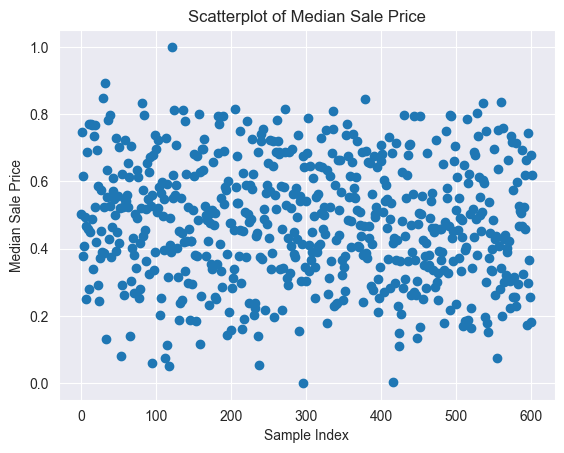

In [162]:
plt.scatter(x=range(df.shape[0]), y=df['median_sale_price'])
plt.xlabel("Sample Index")
plt.ylabel("Median Sale Price")
plt.title("Scatterplot of Median Sale Price")
plt.show()

# Linear Regression

In [163]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression

y_mean = df['median_sale_price'].mean()
model = LinearRegression()
model.fit(X_train, Y_train)

predicted = model.predict(X_test)

print("Mean Absolute Error: " + str(metrics.mean_absolute_error(Y_test, predicted)))
print("Mean Squared Error: " + str(metrics.mean_squared_error(Y_test, predicted)))
print("Root Mean Squared Error: " + str(np.sqrt(metrics.mean_squared_error(Y_test, predicted))))
#print("Mean Absolute Error in % : " + str(metrics.mean_absolute_error(Y_test, predicted)/y_mean) + "%")
coef_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficients'])
print("\n")
print(coef_df)

Mean Absolute Error: 0.006484068379832413
Mean Squared Error: 7.071257714753363e-05
Root Mean Squared Error: 0.00840907706871174


                             Coefficients
is_seasonally_adjusted          -0.000870
property_type                    0.001840
median_sale_price_mom            0.014639
median_sale_price_yoy            0.055408
median_list_price                1.071051
median_list_price_mom           -0.054399
median_list_price_yoy           -0.053820
median_ppsf                      0.860781
median_ppsf_mom                 -0.014959
median_ppsf_yoy                 -0.047173
median_list_ppsf                -0.819671
median_list_ppsf_mom             0.028334
median_list_ppsf_yoy             0.025910
homes_sold                       0.171844
homes_sold_mom                   0.002244
homes_sold_yoy                   0.001248
pending_sales                   -0.002714
pending_sales_mom               -0.018841
pending_sales_yoy                0.014496
new_listings                 

# Lasso Regression

In [164]:
from sklearn.linear_model import Lasso

model = Lasso(random_state=0)
model.fit(X_train, Y_train)
predicted = model.predict(X_test)

print("Mean Absolute Error: " + str(metrics.mean_absolute_error(Y_test, predicted)))
print("Mean Squared Error: " + str(metrics.mean_squared_error(Y_test, predicted)))
print("Root Mean Squared Error: " + str(np.sqrt(metrics.mean_squared_error(Y_test, predicted))))
#print("Mean Absolute Error in % : " + str(metrics.mean_absolute_error(Y_test, predicted)/y_mean) + "%")


Mean Absolute Error: 0.1465794446725753
Mean Squared Error: 0.030818278382656755
Root Mean Squared Error: 0.17555135539965722


# Ridge Regression

In [165]:
from sklearn.linear_model import Ridge

model = Ridge(random_state=0, alpha=0.001)
model.fit(X_train, Y_train)
predicted = model.predict(X_test)

print("Mean Absolute Error: " + str(metrics.mean_absolute_error(Y_test, predicted)))
print("Mean Squared Error: " + str(metrics.mean_squared_error(Y_test, predicted)))
print("Root Mean Squared Error: " + str(np.sqrt(metrics.mean_squared_error(Y_test, predicted))))
#print("Mean Absolute Error in % : " + str(metrics.mean_absolute_error(Y_test, predicted)/y_mean) + "%")

coef_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficients'])
print("\n")
print(coef_df)

Mean Absolute Error: 0.006479057337629802
Mean Squared Error: 7.064671264384408e-05
Root Mean Squared Error: 0.008405159882110755


                             Coefficients
is_seasonally_adjusted          -0.000554
property_type                    0.001867
median_sale_price_mom            0.014334
median_sale_price_yoy            0.054871
median_list_price                1.067197
median_list_price_mom           -0.054526
median_list_price_yoy           -0.053557
median_ppsf                      0.826959
median_ppsf_mom                 -0.014131
median_ppsf_yoy                 -0.044641
median_list_ppsf                -0.788270
median_list_ppsf_mom             0.027165
median_list_ppsf_yoy             0.024032
homes_sold                       0.171615
homes_sold_mom                   0.002316
homes_sold_yoy                   0.001737
pending_sales                    0.000577
pending_sales_mom               -0.019509
pending_sales_yoy                0.014283
new_listings                

# Neural network for regression

Epoch 1/25
7/7 [==============================] - 1s 33ms/step - loss: 0.1845 - val_loss: 0.0524
Epoch 2/25
7/7 [==============================] - 0s 8ms/step - loss: 0.0457 - val_loss: 0.0591
Epoch 3/25
7/7 [==============================] - 0s 7ms/step - loss: 0.0649 - val_loss: 0.0348
Epoch 4/25
7/7 [==============================] - 0s 6ms/step - loss: 0.0337 - val_loss: 0.0385
Epoch 5/25
7/7 [==============================] - 0s 6ms/step - loss: 0.0390 - val_loss: 0.0379
Epoch 6/25
7/7 [==============================] - 0s 6ms/step - loss: 0.0347 - val_loss: 0.0304
Epoch 7/25
7/7 [==============================] - 0s 7ms/step - loss: 0.0338 - val_loss: 0.0304
Epoch 8/25
7/7 [==============================] - 0s 7ms/step - loss: 0.0336 - val_loss: 0.0307
Epoch 9/25
7/7 [==============================] - 0s 7ms/step - loss: 0.0329 - val_loss: 0.0316
Epoch 10/25
7/7 [==============================] - 0s 7ms/step - loss: 0.0331 - val_loss: 0.0314
Epoch 11/25
7/7 [=====================

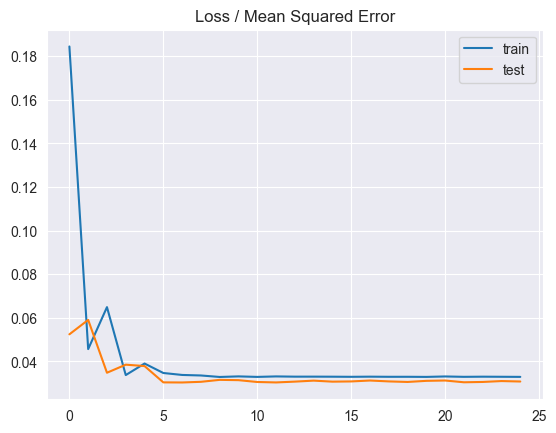

In [169]:
from keras.models import Sequential
from keras.layers import Dropout
from keras.layers import Dense
from keras.optimizers import gradient_descent_v2


model = Sequential()
model.add(Dense(32,input_dim=43, kernel_initializer='uniform', activation='relu'))
model.add(Dense(32, kernel_initializer='uniform', activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64,kernel_initializer='uniform',activation='relu'))
model.add(Dense(32,kernel_initializer='uniform',activation='relu'))
model.add(Dense(1,activation='relu'))

optimizer = gradient_descent_v2.SGD(lr=0.01, momentum=0.9)
model.compile(loss='mean_squared_error', optimizer=optimizer)
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=25, batch_size=75)

train_mse = model.evaluate(X_train, Y_train, verbose=0)
test_mse = model.evaluate(X_test, Y_test, verbose=0)
print('Training error rate: ', train_mse)
print('Testing error rate: ', test_mse)

plt.title('Loss / Mean Squared Error')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

# KNN Regression

In [167]:
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor(n_neighbors=5)
model.fit(X_train, Y_train)
predicted = model.predict(X_test)

print("Mean Absolute Error: " + str(metrics.mean_absolute_error(Y_test, predicted)))
print("Mean Squared Error: " + str(metrics.mean_squared_error(Y_test, predicted)))
print("Root Mean Squared Error: " + str(np.sqrt(metrics.mean_squared_error(Y_test, predicted))))
#print("Mean Absolute Error in % : " + str(metrics.mean_absolute_error(Y_test, predicted)/y_mean) + "%")



Mean Absolute Error: 0.03012856696228289
Mean Squared Error: 0.002265125840069273
Root Mean Squared Error: 0.0475933381900164


# SVR - Support Vector Regression

In [168]:
from sklearn.svm import SVR
model = SVR(kernel='linear', C=1, epsilon=0.1)
model.fit(X_train, Y_train)
predicted = model.predict(X_test)

print("Mean Absolute Error: " + str(metrics.mean_absolute_error(Y_test, predicted)))
print("Mean Squared Error: " + str(metrics.mean_squared_error(Y_test, predicted)))
print("Root Mean Squared Error: " + str(np.sqrt(metrics.mean_squared_error(Y_test, predicted))))
#print("Mean Absolute Error in % : " + str(metrics.mean_absolute_error(Y_test, predicted)/y_mean) + "%")

Mean Absolute Error: 0.032251227179070724
Mean Squared Error: 0.0016750697228812088
Root Mean Squared Error: 0.04092761565106388
